In [ ]:
import os
import random
from skimage.util import random_noise
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path="/content/drive/MyDrive/fipimages/images (1)/images"
img=os.listdir(path)
img
len(img)

393

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
p=random.choice(img)
p

'Cars274.png'

In [ ]:
l=cv2.imread(os.path.join(path,p))
cv2.imshow('original',l)
cv2.waitKey(0)
plt.imshow(l)

C:\Users\hp\AppData\Local\Temp\ipykernel_7664\2282470372.py:7: RuntimeWarning: divide by zero encountered in log
  iml = c * (np.log(gimg + 1))


Text(0.5, 1.0, 'Log')

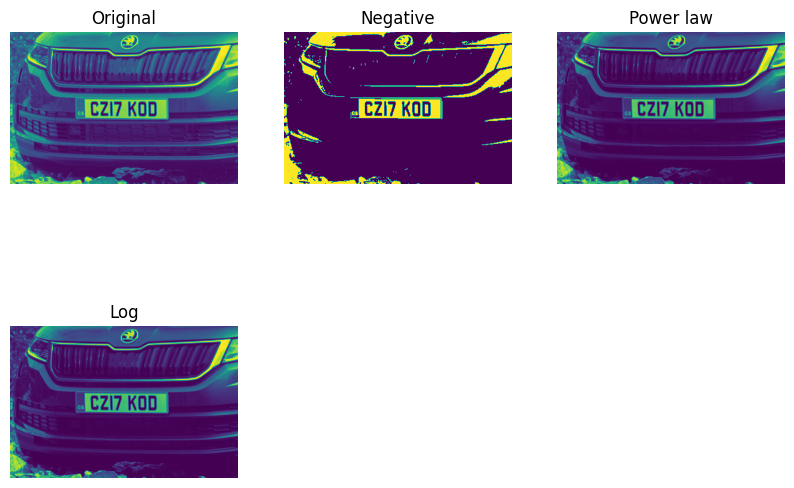

In [ ]:
gimg= cv2.cvtColor(l, cv2.COLOR_BGR2GRAY)
#im=255-gimg;
#im=cv2.bitwise_not(gimg)
(thresh, imn) = cv2.threshold(gimg, 127, 255, cv2.THRESH_BINARY)#negative
imp = cv2.pow(gimg/255,1.8)#powerlaw
c = 255 / np.log(1 + np.max(gimg))
iml = c * (np.log(gimg + 1))
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2,3, 1)
plt.imshow(gimg)
plt.axis('off')
plt.title("Original")
fig.add_subplot(2,3,2)
plt.imshow(imn)
plt.axis('off')
plt.title("Negative")
fig.add_subplot(2,3,3)
plt.imshow(imp)
plt.axis('off')
plt.title("Power law")
fig.add_subplot(2,3,4)
plt.imshow(imp)
plt.axis('off')
plt.title("Log")

Text(0.5, 1.0, 'Normalized histogram')

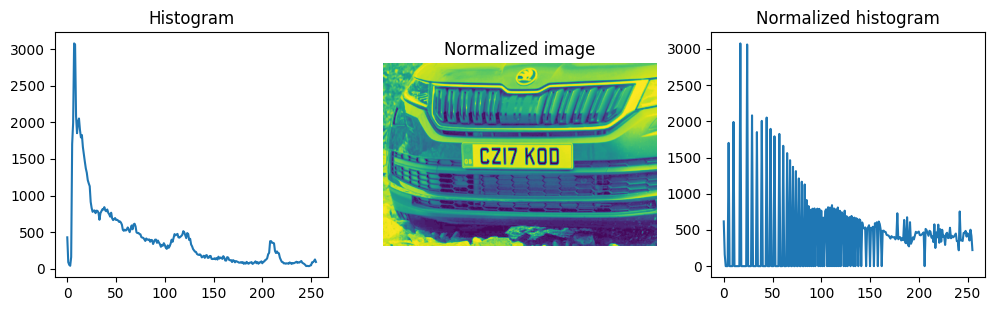

In [ ]:
hist1 = cv2.calcHist([gimg],[0],None,[256],[0,256])
img_2 = cv2.equalizeHist(gimg)
hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])
fig = plt.figure(figsize=(12, 7))
fig.add_subplot(2,3, 1)
plt.plot(hist1)
plt.axis('on')
plt.title("Histogram")
fig.add_subplot(2,3,2)
plt.imshow(img_2)
plt.axis('off')
plt.title("Normalized image")
fig.add_subplot(2,3,3)
plt.plot(hist2)
plt.axis('on')
plt.title("Normalized histogram")


In [ ]:
#add noise
noise_img = random_noise(gimg, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

In [ ]:
sm=cv2.bilateralFilter(gimg , 11 , 17 , 17)
cv2.imshow("Smoother Image",gimg)
cv2.waitKey(0)

-1

In [ ]:
edged=cv2.Canny(gimg,170,200)
cv2.imshow("Canny edge",edged)
cv2.waitKey(0)

-1

In [ ]:
'''kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])'''
kernel = np.array([[1, 1, 1],
                   [1, -8,1],
                   [1, 1, 1]])
image_sharp = cv2.filter2D(src=gimg, ddepth=-1, kernel=kernel)

Text(0.5, 1.0, 'Laplacian Sharpening')

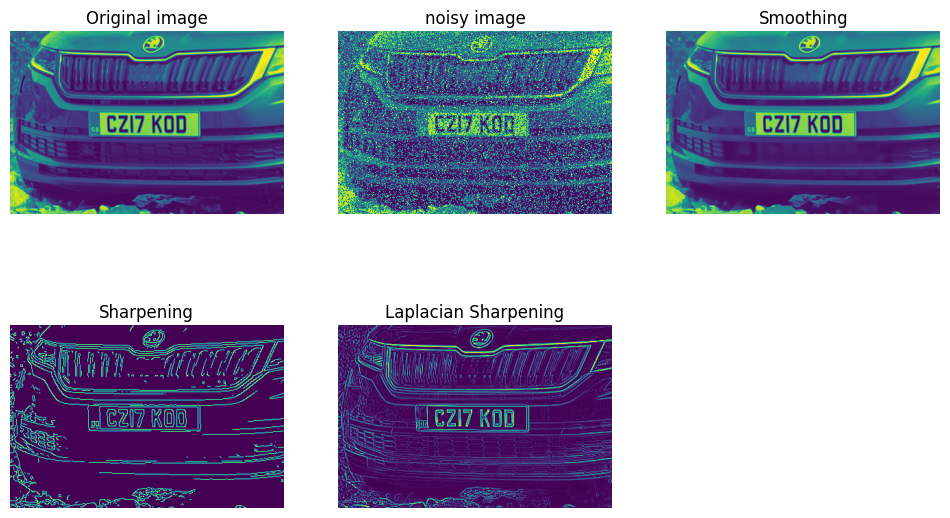

In [ ]:

fig = plt.figure(figsize=(12, 7))
fig.add_subplot(2,3, 1)
plt.imshow(gimg)
plt.axis('off')
plt.title('Original image')
fig.add_subplot(2,3,2)
plt.imshow(noise_img)
plt.axis('off')
plt.title("noisy image")
fig.add_subplot(2,3,3)
plt.imshow(sm)
plt.axis('off')
plt.title("Smoothing")
fig.add_subplot(2,3,4)
plt.imshow(edged)
plt.axis('off')
plt.title("Sharpening")
fig.add_subplot(2,3,5)
plt.imshow(image_sharp)
plt.axis('off')
plt.title("Laplacian Sharpening")

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


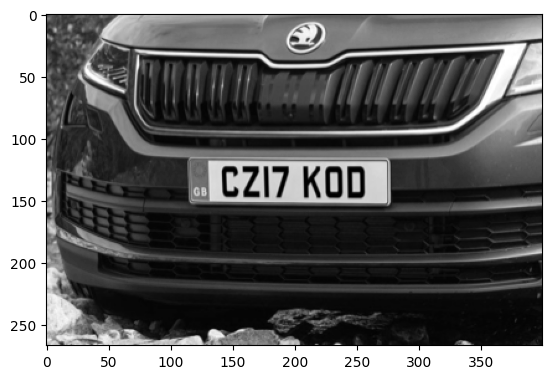

In [ ]:
gray = cv2.cvtColor(l,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

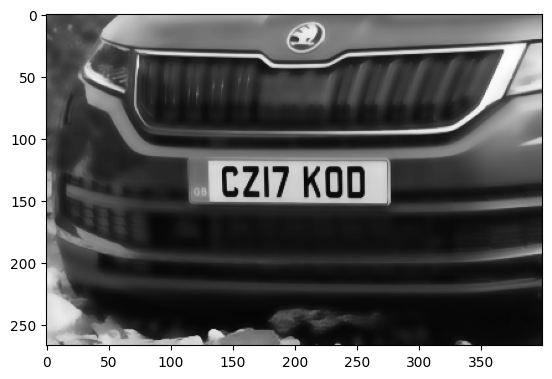

In [ ]:
blurred_gray = cv2.bilateralFilter(gray, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(267, 400)


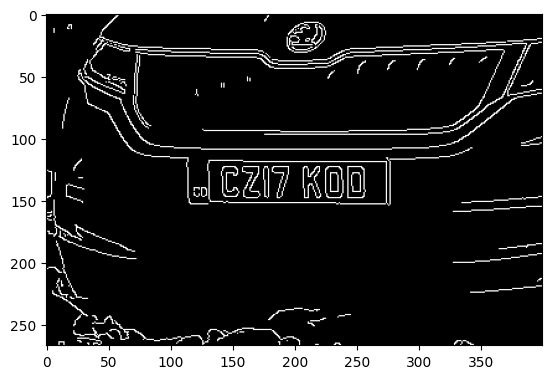

In [ ]:
edged = cv2.Canny(blurred_gray, 140, 200)
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

583.3969684839249
[[[343 108]]

 [[274 116]]

 [[276 154]]

 [[274 119]]

 [[131 118]]

 [[131 149]]

 [[276 154]]

 [[277 117]]]
353.79898953437805
[[[130 121]]

 [[273 119]]

 [[274 152]]

 [[133 151]]]


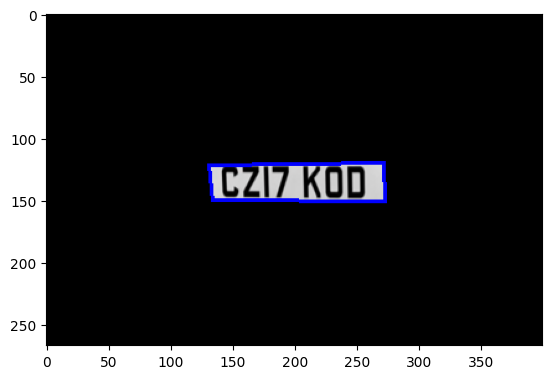

In [ ]:
import imutils
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    print(peri)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    print(approx)
    if len(approx) == 4:
        screenCnt = approx
        break
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1
if detected == 1:
    cv2.drawContours(l, [screenCnt], -1, (0, 0, 255), 3)
    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(l,l,mask=mask)
    plt.imshow(new_image)
#cv2.imshow("plate",new_image)